In [1]:
%load_ext lab_black

In [2]:
%run -i ./preamble.py

In [3]:
from simulate import *
from inverse_moments import *

In [4]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
import timeit
from tqdm.notebook import trange, tqdm

In [5]:
plt.rcParams["figure.figsize"] = (3.0, 3.0)
plt.rcParams["figure.dpi"] = 500
plt.rcParams["font.size"] = 12

In [9]:
lambda0 = 1.0
beta = 0.25
lambdaS = 3
lambdaE = 10.0
rho = 1.25
mat = 100

## Look at choosing the correct step size for the thinning alg

CPU times: user 30.4 s, sys: 0 ns, total: 30.4 s
Wall time: 30.4 s


1.8611111111111112

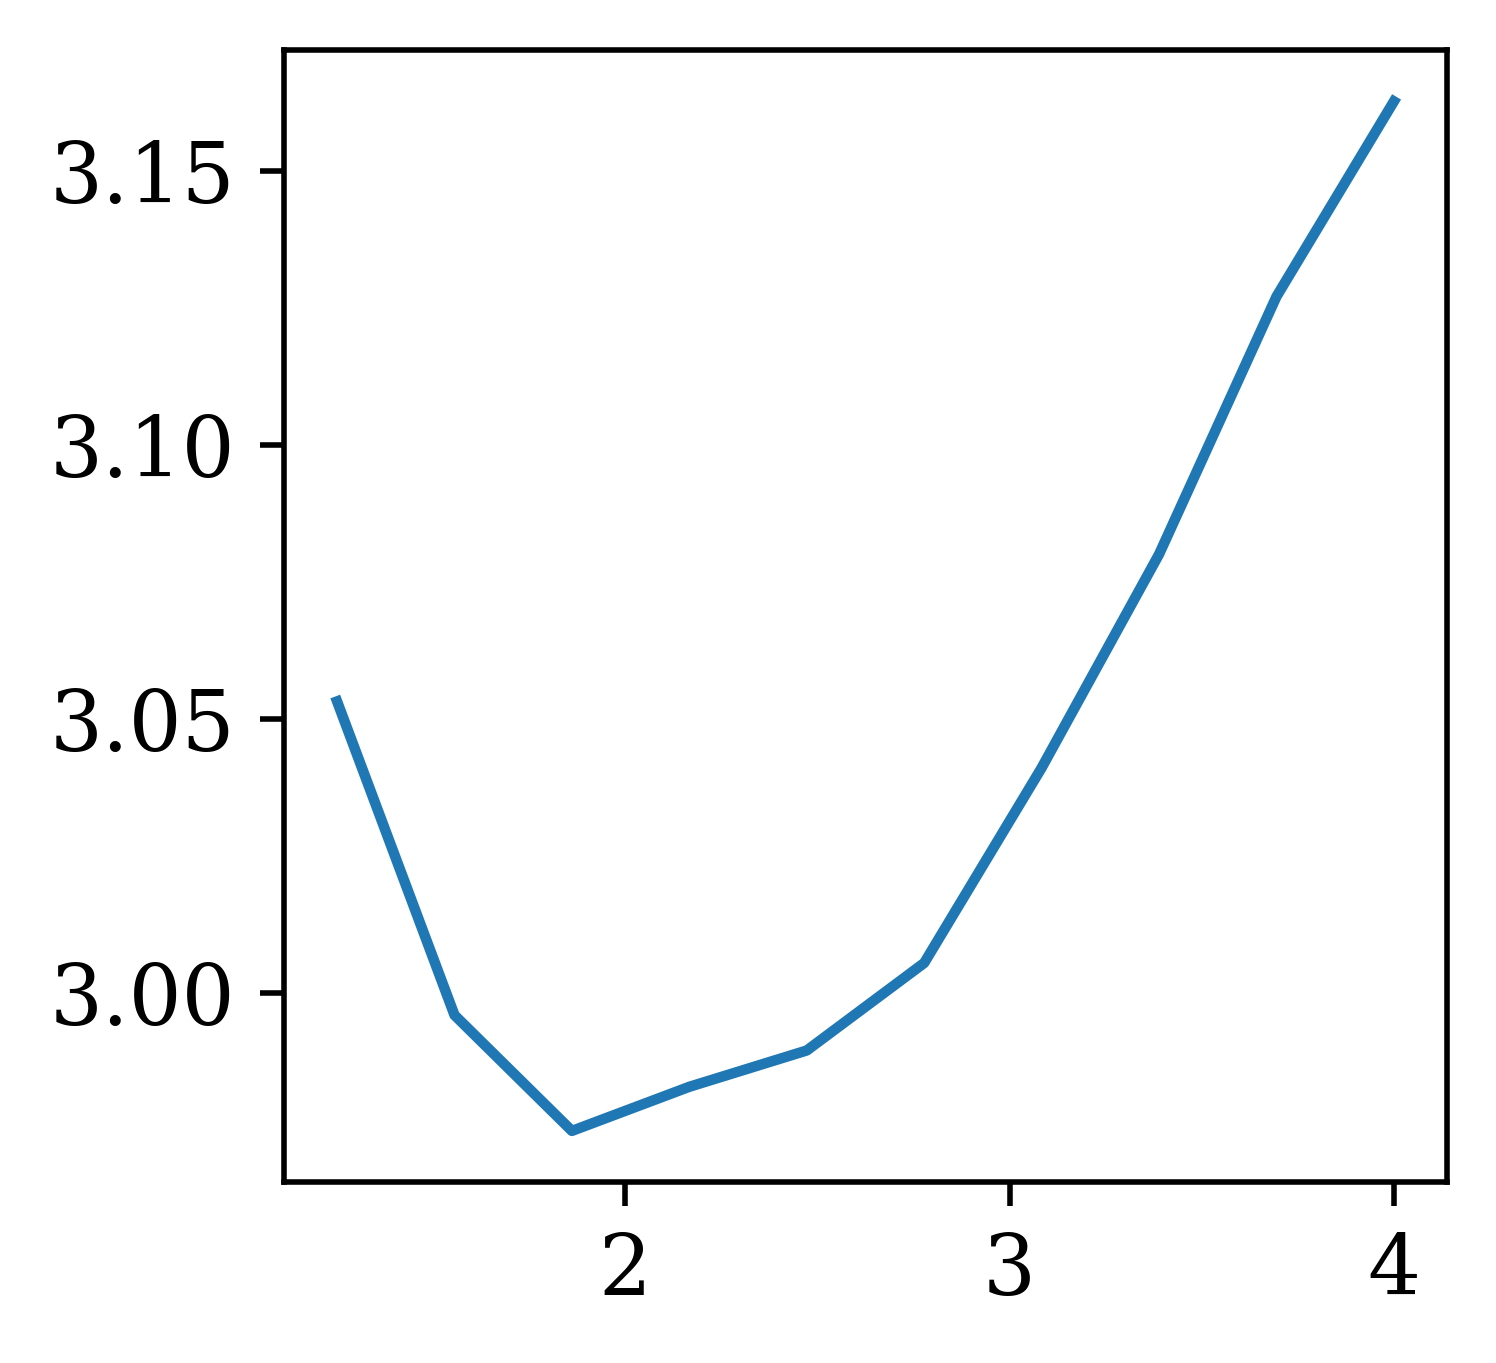

In [14]:
%%time 
rnd.seed(1)
R = 10**3
steps = np.linspace(1.25, 4, 10)
timesSteps = np.zeros(len(steps))
for i, s in enumerate(steps):
    start = time()
    for r in range(R):
        simulate_thinning(lambda0, beta, lambdaS, lambdaE, rho, mat, s)
    timesSteps[i] = time() - start
    
plt.plot(steps, timesSteps);
steps[np.argmin(timesSteps)]

In [15]:
step = steps[np.argmin(timesSteps)]
step

1.8611111111111112

## Create the tables for the paper

In [16]:
repeat = 3

In [12]:
%%time
RExps = [2,3,4,5]
timesExact = []
for RExp in RExps:
    R = 10**RExp
    print(f"R = 10^{RExp}", end="")
    setup = "import simulate"
    rnd.seed(1)
    code = f"simulate.simulate_exact({lambda0}, {beta}, {lambdaS}, {lambdaE}, {rho}, {mat}, {R})"
    bestRun = np.min(timeit.repeat(code, setup, number=1, repeat=repeat))
    timesExact.append(bestRun)
    print(f", Best time of {repeat} = {bestRun} secs", flush=True)

R = 10^2, Best time of 3 = 0.020477195037528872 secs
R = 10^3, Best time of 3 = 0.05438036797568202 secs
R = 10^4, Best time of 3 = 0.3600293651688844 secs
R = 10^5, Best time of 3 = 3.2992070810869336 secs
CPU times: user 10.1 s, sys: 1.15 s, total: 11.3 s
Wall time: 11.3 s


In [17]:
%%time
RExps = [2,3,4,5]
timesThin = []
for RExp in RExps:
    R = 10**RExp
    print(f"R = 10^{RExp}", end="")
    setup = "import simulate"
    rnd.seed(1)
    code = f"[simulate.simulate_thinning({lambda0}, {beta}, {lambdaS}, {lambdaE}, {rho}, {mat}, {step}) for r in range({R})]"
    bestRun = np.min(timeit.repeat(code, setup, number=1, repeat=repeat))
    timesThin.append(bestRun)
    print(f", Best time of {repeat} = {bestRun} secs", flush=True)

R = 10^2, Best time of 3 = 0.3026417170185596 secs
R = 10^3, Best time of 3 = 3.032930768094957 secs
R = 10^4, Best time of 3 = 30.760612901998684 secs
R = 10^5, Best time of 3 = 310.31837136182 secs
CPU times: user 17min 12s, sys: 1.69 s, total: 17min 13s
Wall time: 17min 13s
